In [2]:
import pandas as pd
from VectorNormalizer import VectorNormalizer
import pickle

pickle will be used to read the norms for using in inverse transformation - see and use the Notebook 4 Clean and Transform for following workflow

> Transform the data -> Train the model on transformed data -> Inverse Transform -> Clustering

In [4]:
with open('inverse_transformations.pkl', 'rb') as infile:
    inverse_transformations = pickle.load(infile)

In [5]:
type(inverse_transformations)

dict

In [6]:
inverse_transformations.keys()

dict_keys(['position_norms', 'speed_norms'])

In [12]:
import requests

In [13]:
response = requests.get('https://ai-emp-fog-comp.herokuapp.com/data').json()

In [14]:
data = pd.DataFrame.from_dict(response['data'])

In [15]:
data

,Vehicle 1 Speed,Vehicle 2 Speed,Vehicle 3 Speed,Vehicle 4 Speed,Vehicle 5 Speed,Vehicle 6 Speed,Vehicle 7 Speed,Vehicle 8 Speed,Vehicle 9 Speed,Vehicle 10 Speed,...,Vehicle 8 Position,Vehicle 9 Position,Vehicle 10 Position,Vehicle 11 Position,Vehicle 12 Position,Vehicle 13 Position,Vehicle 14 Position,Vehicle 15 Position,Vehicle 16 Position,Vehicle 17 Position
0,0.027346,0.047985,0.054706,0.013352,0.004822,-0.011490,0.009579,-0.016915,0.047802,0.029120,...,0.025812,0.029769,0.030708,0.028101,0.029805,0.012965,0.025751,0.031615,0.025937,0.005722
1,-0.017027,-0.013087,-0.028707,0.027239,0.008036,0.014226,-0.053747,0.041230,-0.015759,-0.050828,...,0.030105,0.028598,0.023706,0.027791,0.028467,0.010624,0.025793,0.027447,0.029265,0.011641
2,-0.030958,-0.019085,0.000000,-0.035784,-0.018215,-0.007113,0.059069,-0.033829,-0.029942,0.030179,...,0.026537,0.026374,0.027863,0.027714,0.029686,0.010354,0.030225,0.027745,0.026473,0.021782
3,0.058304,0.034353,-0.020582,-0.009080,0.040180,-0.022433,-0.009579,-0.014800,-0.006829,-0.025414,...,0.024976,0.025867,0.024362,0.028023,0.028849,0.009724,0.026964,0.027983,0.028730,0.029793
4,-0.046437,-0.034898,0.027082,0.023500,-0.033216,0.006019,-0.026608,0.035944,0.056206,0.006353,...,0.028767,0.030003,0.025237,0.028591,0.027415,0.006453,0.030601,0.030126,0.026932,0.030227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.055208,0.023447,-0.010833,-0.055012,0.049288,0.054167,-0.026608,0.001586,-0.020486,-0.009530,...,0.027206,0.028169,0.025675,0.026914,0.029088,0.028992,0.027674,0.031615,0.029877,0.028214
1466,-0.028894,-0.025083,-0.030874,0.049137,0.011250,-0.033923,0.019690,-0.015858,-0.013658,0.024884,...,0.025478,0.027155,0.029103,0.028333,0.028132,0.028031,0.030852,0.030603,0.028156,0.027741
1467,0.033022,0.022356,0.049290,-0.005875,-0.005357,-0.007660,0.019157,0.006872,-0.018911,0.010060,...,0.026202,0.025750,0.030489,0.029055,0.027558,0.028661,0.026671,0.031972,0.029839,0.030464
1468,-0.019607,-0.007634,-0.031415,0.015489,-0.033216,-0.014226,0.007982,0.000000,0.045175,-0.003706,...,0.026202,0.029106,0.029978,0.029907,0.027033,0.026591,0.028343,0.026792,0.028500,0.028017


In [16]:
# assume we want to inverse transform the test speeds and positions
# test data is from 1200 to 1470

In [17]:
test_df = data.iloc[1200:, :]

In [18]:
test_df.head(n=2)

,Vehicle 1 Speed,Vehicle 2 Speed,Vehicle 3 Speed,Vehicle 4 Speed,Vehicle 5 Speed,Vehicle 6 Speed,Vehicle 7 Speed,Vehicle 8 Speed,Vehicle 9 Speed,Vehicle 10 Speed,...,Vehicle 8 Position,Vehicle 9 Position,Vehicle 10 Position,Vehicle 11 Position,Vehicle 12 Position,Vehicle 13 Position,Vehicle 14 Position,Vehicle 15 Position,Vehicle 16 Position,Vehicle 17 Position
1200,-0.019091,-0.008179,0.012458,0.024034,-0.006965,-0.058545,0.000000,-0.015329,-0.033619,0.053475,...,0.028098,0.026804,0.032604,0.029081,0.028849,0.028721,0.027340,0.024470,0.030643,0.030858
1201,-0.003096,0.016358,0.001083,-0.033648,0.003750,-0.005471,0.053747,0.007400,0.042549,-0.015884,...,0.028878,0.030003,0.030416,0.029571,0.026746,0.030012,0.029472,0.030246,0.028615,0.027070


When we transformed the data this was our order of transforming
1. Time differencing
2. Vector Nomralization

Now when we are inverse transforming, the order will be opposite

## Inverse Vector Normalization

In [20]:
normalizer = VectorNormalizer()

# we need to inverse transform speed and position separately
test_df_speed = test_df.iloc[:, :17]
test_df_position = test_df.iloc[:, 17:]

inverse_vector_norm_test_speed = normalizer.inverse_transform(test_df_speed, inverse_transformations['speed_norms'])

inverse_vector_norm_test_position = normalizer.inverse_transform(test_df_position, inverse_transformations['position_norms'])

In [23]:
inverse_vector_norm_test_position

,Vehicle 1 Position,Vehicle 2 Position,Vehicle 3 Position,Vehicle 4 Position,Vehicle 5 Position,Vehicle 6 Position,Vehicle 7 Position,Vehicle 8 Position,Vehicle 9 Position,Vehicle 10 Position,Vehicle 11 Position,Vehicle 12 Position,Vehicle 13 Position,Vehicle 14 Position,Vehicle 15 Position,Vehicle 16 Position,Vehicle 17 Position
1200,12.26,7.29,9.94,13.48,11.15,2.24,11.31,5.04,6.87,4.47,11.27,12.07,9.57,6.54,4.11,8.01,7.82
1201,12.20,7.59,9.96,12.86,11.21,2.14,12.32,5.18,7.69,4.17,11.46,11.19,10.00,7.05,5.08,7.48,6.86
1202,12.38,6.69,10.87,12.94,11.55,2.99,11.32,5.01,7.50,4.33,11.09,11.30,9.38,6.28,5.19,7.87,6.58
1203,12.49,7.02,10.28,13.24,11.43,3.01,12.39,5.58,7.32,3.59,11.07,12.09,9.91,6.54,4.30,7.06,7.15
1204,12.20,6.78,10.54,13.68,11.70,2.87,12.15,5.17,7.82,4.48,11.31,12.22,9.77,7.16,4.65,7.16,7.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,12.83,7.22,10.45,12.75,11.48,3.37,11.54,4.88,7.22,3.52,10.43,12.17,9.66,6.62,5.31,7.81,7.15
1466,12.27,6.76,9.88,13.66,11.70,2.75,11.91,4.57,6.96,3.99,10.98,11.77,9.34,7.38,5.14,7.36,7.03
1467,12.91,7.17,10.79,13.55,11.61,2.61,12.27,4.70,6.60,4.18,11.26,11.53,9.55,6.38,5.37,7.80,7.72
1468,12.53,7.03,10.21,13.84,10.98,2.36,12.42,4.70,7.46,4.11,11.59,11.31,8.86,6.78,4.50,7.45,7.10


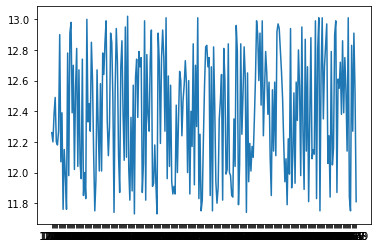

In [25]:
import matplotlib.pyplot as plt
plt.plot(inverse_vector_norm_test_position.iloc[:, 0])

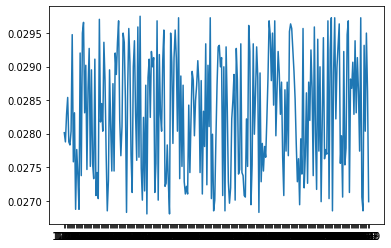

In [26]:
plt.plot(test_df_position.iloc[:, 0])

## Testing for clustering

In [ ]:
last_15_steps = 

Now we need to perform inverse time differencing

In [ ]:
def invert_difference(orig_data, diff_data, interval):
    return [diff_data[i-interval] + orig_data[i-interval] for i in range(interval, len(orig_data))]

inverse_df_position = pd.DataFrame()

for i, series in enumerate(positions_df):
    inverse_df_position[series] = invert_difference(pos_orig_df[series], positions_df[series], 1)